# Exploring Extrasolar Planets with ML Approach

### We are going to create a classification model that will help us to identify a better candidate for a earth like habitable planet using Kepler Mission Data.

### Importing all the basic library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

c:\users\avigy\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Importing the Kepler DataSet

In [2]:
df = pd.read_csv('kepler_data.csv')

In [3]:
#Display all the rows and columns upto 100 observation
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

### Data Insights & EDA

In [4]:
# Printing the shape of the train and test dataset

print(df.shape)
print('The shape of train data is: Row {} columns {}'.format(df.shape[0],df.shape[1]))

(9564, 50)
The shape of train data is: Row 9564 columns 50


In [5]:
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


- The Kepler space telescope is a retired space telescope launched by NASA in 2009 to discover Earth-size planets orbiting other stars. We can download the data recorded by Kepler from Exoplanet Archive. The NASA Exoplanet Archive is an online astronomical exoplanet and stellar catalog. Kepler Identifies the KOI (Kepler Object of Interest and made a comprehensive analysis to disposition them into planet candidates and false positives.



### Let us rename the features for a better understanding.

In [6]:
df = df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'Exoplanet_Archive_Disposition',
'koi_pdisposition':'Disposition_Using_KeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit_LikeFPFlag',
'koi_fpflag_ss':'StellarEclipse_FP_Flag',
'koi_fpflag_co':'CentroidOffsetFPFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFPFlag',
'koi_period':'OrbitalPeriod_days',
'koi_period_err1':'OrbitalPeriodUpper_days',
'koi_period_err2':'OrbitalPeriodLower_days',
'koi_time0bk':'TransitEpoch_BKJD',
'koi_time0bk_err1':'TransitEpoch_Lower',
'koi_time0bk_err2':'TransitEpoch_Upper',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameter_Lower',
'koi_impact_err2':'ImpactParameter_Upper',
'koi_duration':'TransitDuration_hrs',
'koi_duration_err1':'TransitDuration_Lower',
'koi_duration_err2':'TransitDuration_Upper',
'koi_depth':'TransitDepth_ppm',
'koi_depth_err1':'TransitDepth_Lower',
'koi_depth_err2':'TransitDepth_Upper',
'koi_prad':'PlanetaryRadius_Earthradii',
'koi_prad_err1':'PlanetaryRadius_Lower',
'koi_prad_err2':'PlanetaryRadius_Upper',
'koi_teq':'EquilibriumTemperature_K',
'koi_teq_err1':'EquilibriumTemperature_Lower',
'koi_teq_err2':'EquilibriumTemperature_Upper',
'koi_insol':'InsolationFlux_Earthflux',
'koi_insol_err1':'InsolationFlux_Lower',
'koi_insol_err2':'InsolationFlux_Upper',
'koi_model_snr':'TransitSignal_to_Noise',
'koi_tce_plnt_num':'TCE_PlanetNumber',
'koi_tce_delivname':'TCE_DeliverName',
'koi_steff':'StellarEffectiveTemperature_K',
'koi_steff_err1':'StellarEffectiveTemp_Lower',
'koi_steff_err2':'StellarEffectiveTemp_Upper',
'koi_slogg':'StellarSurfaceGravity',
'koi_slogg_err1':'Stellar_SurfaceGravity_Lower',
'koi_slogg_err2':'Stellar_SurfaceGravity_Upper',
'koi_srad':'StellarRadius_Solarradii',
'koi_srad_err1':'StellarRadius_Lower',
'koi_srad_err2':'StellarRadius_Upper',
'ra':'RA_deg',
'dec':'Dec_deg',
'koi_kepmag':'Kepler_band[mag]'
})

In [7]:
df.head()

,rowid,KepID,KOIName,KeplerName,Exoplanet_Archive_Disposition,Disposition_Using_KeplerData,DispositionScore,NotTransit_LikeFPFlag,StellarEclipse_FP_Flag,CentroidOffsetFPFlag,EphemerisMatchIndicatesContaminationFPFlag,OrbitalPeriod_days,OrbitalPeriodUpper_days,OrbitalPeriodLower_days,TransitEpoch_BKJD,TransitEpoch_Lower,TransitEpoch_Upper,ImpactParamete,ImpactParameter_Lower,ImpactParameter_Upper,TransitDuration_hrs,TransitDuration_Lower,TransitDuration_Upper,TransitDepth_ppm,TransitDepth_Lower,TransitDepth_Upper,PlanetaryRadius_Earthradii,PlanetaryRadius_Lower,PlanetaryRadius_Upper,EquilibriumTemperature_K,EquilibriumTemperature_Lower,EquilibriumTemperature_Upper,InsolationFlux_Earthflux,InsolationFlux_Lower,InsolationFlux_Upper,TransitSignal_to_Noise,TCE_PlanetNumber,TCE_DeliverName,StellarEffectiveTemperature_K,StellarEffectiveTemp_Lower,StellarEffectiveTemp_Upper,StellarSurfaceGravity,Stellar_SurfaceGravity_Lower,Stellar_SurfaceGravity_Upper,StellarRadius_Solarradii,StellarRadius_Lower,StellarRadius_Upper,RA_deg,Dec_deg,Kepler_band[mag]
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rowid                                       9564 non-null   int64  
 1   KepID                                       9564 non-null   int64  
 2   KOIName                                     9564 non-null   object 
 3   KeplerName                                  2294 non-null   object 
 4   Exoplanet_Archive_Disposition               9564 non-null   object 
 5   Disposition_Using_KeplerData                9564 non-null   object 
 6   DispositionScore                            8054 non-null   float64
 7   NotTransit_LikeFPFlag                       9564 non-null   int64  
 8   StellarEclipse_FP_Flag                      9564 non-null   int64  
 9   CentroidOffsetFPFlag                        9564 non-null   int64  
 10  EphemerisMat

#### Comments:

- This info reflects that there are some null values and few are completely empty ('EquilibriumTemperature_err1','EquilibriumTemperature_err2') so we can just remove them. 
- And most of the features are numerical so let's first look the cate gorical features in breif.

### Handling Missing Values

In [9]:
#Checking for missing values

df.isnull().sum()

rowid                                            0
KepID                                            0
KOIName                                          0
KeplerName                                    7270
Exoplanet_Archive_Disposition                    0
Disposition_Using_KeplerData                     0
DispositionScore                              1510
NotTransit_LikeFPFlag                            0
StellarEclipse_FP_Flag                           0
CentroidOffsetFPFlag                             0
EphemerisMatchIndicatesContaminationFPFlag       0
OrbitalPeriod_days                               0
OrbitalPeriodUpper_days                        454
OrbitalPeriodLower_days                        454
TransitEpoch_BKJD                                0
TransitEpoch_Lower                             454
TransitEpoch_Upper                             454
ImpactParamete                                 363
ImpactParameter_Lower                          454
ImpactParameter_Upper          

#### Comments:

-   We can drop the features 'EquilibriumTemperature_err1','EquilibriumTemperature_err2','KeplerName' as most of the values are missing.
- we can impute other null values with mean.

In [10]:
df['TCE_DeliverName'].value_counts()

q1_q17_dr25_tce    8054
q1_q16_tce          796
q1_q17_dr24_tce     368
Name: TCE_DeliverName, dtype: int64

#### Comments:
- We can see that the column 'TCE_DeliverName' has almost all the values assigned to a single category so it is not going to contribute much in model training so we gonna drop it.

In [11]:
df.drop(columns=['EquilibriumTemperature_Lower','EquilibriumTemperature_Upper','KeplerName','TCE_DeliverName'],inplace=True)

In [12]:
#Separiting the categorical features

categorical= df.select_dtypes(include =[np.object])
print("Categorical Features in DataSet:",categorical.shape[1])
print(categorical.columns)

Categorical Features in DataSet: 3
Index(['KOIName', 'Exoplanet_Archive_Disposition',
       'Disposition_Using_KeplerData'],
      dtype='object')


In [13]:
# Filling the null values of numerical features with the respective mean

numerical=df.select_dtypes(include =[np.float64,np.int64])

from sklearn.impute import SimpleImputer

imputer= SimpleImputer(strategy='mean')
df_numerical=imputer.fit_transform(numerical)

df_numerical=pd.DataFrame(df_numerical,columns=numerical.columns)

#### Let's now concatenate the both numerical and categorical data

In [14]:
df= pd.concat([df_numerical,categorical],axis=1)

In [15]:
df.head()

,rowid,KepID,DispositionScore,NotTransit_LikeFPFlag,StellarEclipse_FP_Flag,CentroidOffsetFPFlag,EphemerisMatchIndicatesContaminationFPFlag,OrbitalPeriod_days,OrbitalPeriodUpper_days,OrbitalPeriodLower_days,TransitEpoch_BKJD,TransitEpoch_Lower,TransitEpoch_Upper,ImpactParamete,ImpactParameter_Lower,ImpactParameter_Upper,TransitDuration_hrs,TransitDuration_Lower,TransitDuration_Upper,TransitDepth_ppm,TransitDepth_Lower,TransitDepth_Upper,PlanetaryRadius_Earthradii,PlanetaryRadius_Lower,PlanetaryRadius_Upper,EquilibriumTemperature_K,InsolationFlux_Earthflux,InsolationFlux_Lower,InsolationFlux_Upper,TransitSignal_to_Noise,TCE_PlanetNumber,StellarEffectiveTemperature_K,StellarEffectiveTemp_Lower,StellarEffectiveTemp_Upper,StellarSurfaceGravity,Stellar_SurfaceGravity_Lower,Stellar_SurfaceGravity_Upper,StellarRadius_Solarradii,StellarRadius_Lower,StellarRadius_Upper,RA_deg,Dec_deg,Kepler_band[mag],KOIName,Exoplanet_Archive_Disposition,Disposition_Using_KeplerData
0,1.0,10797460.0,1.000,0.0,0.0,0.0,0.0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,K00752.01,CONFIRMED,CANDIDATE
1,2.0,10797460.0,0.969,0.0,0.0,0.0,0.0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,K00752.02,CONFIRMED,CANDIDATE
2,3.0,10811496.0,0.000,0.0,1.0,0.0,0.0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,K00753.01,FALSE POSITIVE,FALSE POSITIVE
3,4.0,10848459.0,0.000,0.0,1.0,0.0,0.0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,K00754.01,FALSE POSITIVE,FALSE POSITIVE
4,5.0,10854555.0,1.000,0.0,0.0,0.0,0.0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,K00755.01,CONFIRMED,CANDIDATE


### Now let's determine the target variable to set the objective of this project.

#### 'Exoplanet_Archive_Disposition' and 'Disposition_Using_KeplerData' are the two important feature that could be our output variable.
##### Let us study these two features in detail.


##### Exoplanet_Archive_Disposition

In [16]:
df['Exoplanet_Archive_Disposition'].value_counts()

FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: Exoplanet_Archive_Disposition, dtype: int64

<AxesSubplot:xlabel='Exoplanet_Archive_Disposition', ylabel='count'>

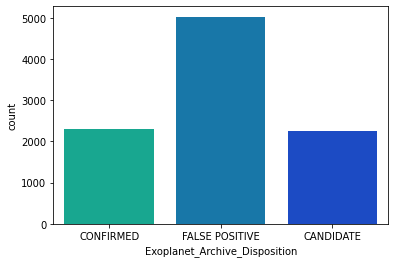

In [17]:
sns.countplot(df['Exoplanet_Archive_Disposition'],palette='winter_r')

#### Comments:

- This feature represents the category of a KOI from the Exoplanet Archive and it could be False Positive or Candidate or Confirmed.

##### Disposition_Using_KeplerData

In [18]:
df['Disposition_Using_KeplerData'].value_counts()

FALSE POSITIVE    5068
CANDIDATE         4496
Name: Disposition_Using_KeplerData, dtype: int64

<AxesSubplot:xlabel='Disposition_Using_KeplerData', ylabel='count'>

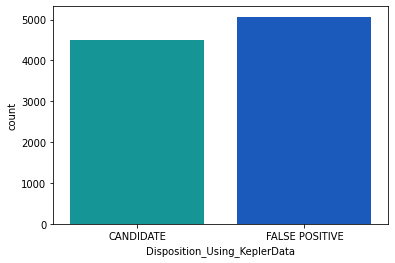

In [19]:
sns.countplot(df['Disposition_Using_KeplerData'],palette='winter_r')

#### Comments:

- This feature represents the disposition done by the analysis of Kepler data. And it could be either False Positive or Candidate.

###  For this project I am going to keep 'Disposition_Using_KeplerData' as the target variable. 
### The objective of the model will be to predict the likelihood of a KOI to be a Candidate exoplanet.
#### The ratio of the classes in the target seems to balanced so we can proceed with that.

###### Ploting the field view of kepler object of interest showing all the candidates and false positive class.

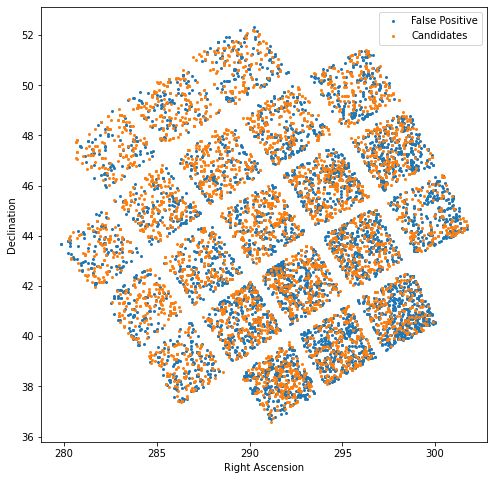

In [20]:
import matplotlib.pyplot as plt

Candidate = df[df.Disposition_Using_KeplerData == 'CANDIDATE']
FP = df[df.Disposition_Using_KeplerData == 'FALSE POSITIVE']

ra_f, dec_f = FP.RA_deg, FP.Dec_deg
ra_c, dec_c = Candidate.RA_deg, Candidate.Dec_deg

fig = plt.figure(figsize=(8,8))

plt.scatter(ra_f, dec_f, s=4, label='False Positive')
plt.scatter(ra_c, dec_c, s=4, label="Candidates")

plt.xlabel("Right Ascension")
plt.ylabel("Declination")

plt.legend()

##### We will now explore a bit more about the features that contributes to disposition an exoplanet Candidates from the Kepler Data.

AS we know that Kepler's objective is to study the structure and diversity of the planetary system by using transit method.
So Now we will focus on the Transit properties to identify the exoplanets.

In [21]:
Candidate = df[df.Disposition_Using_KeplerData == 'CANDIDATE']

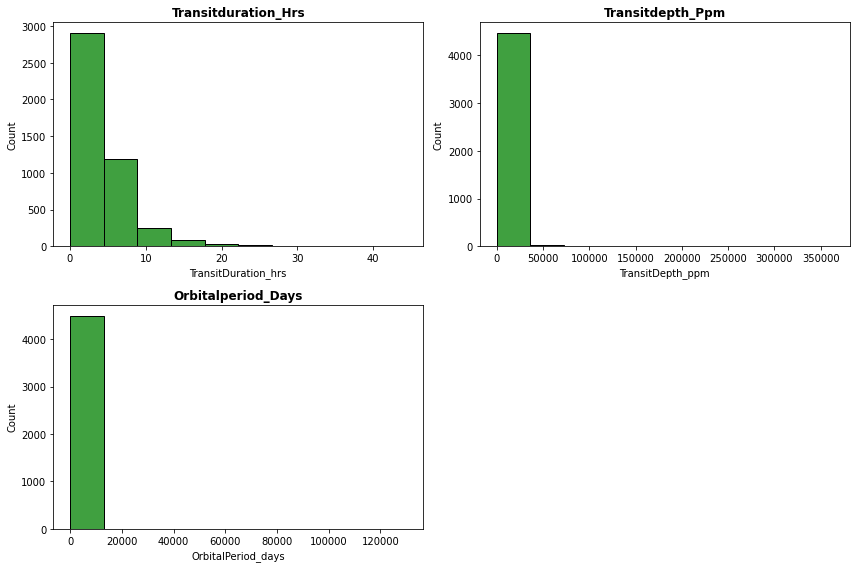

In [22]:
Transit_Properties1=['TransitDuration_hrs','TransitDepth_ppm','OrbitalPeriod_days']

target = [i for i in Transit_Properties1]
plt.figure(figsize=(12,8))
for n,i in enumerate(target):
    plot=plt.subplot(2,2,n+1)
    sns.histplot(Candidate[i],color='green',bins=10)
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()


#### Comments:
 - The Transit duration for most of the candidates is less than 10 hours i.e. transit time is less which implies that possibility of the planet to be gravitationaly bound to it's host star.
 - For most of the candidate exoplanet the Transit depth is low which signifies low Stellar flux is lost during transit that implies the possibility of the planet to be closely rotating in an orbit to the host star.
 - Again Less orbital period signifies the candidate planet is at close proximity and is orbiting the host star.

<AxesSubplot:xlabel='TransitDepth_ppm', ylabel='TransitDuration_hrs'>

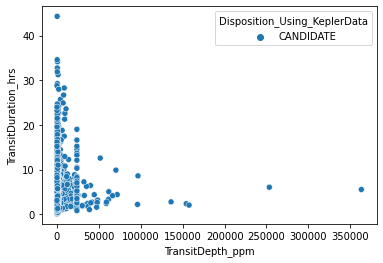

In [23]:
sns.scatterplot(df['TransitDepth_ppm'],df['TransitDuration_hrs'],hue=Candidate['Disposition_Using_KeplerData'])

- The above plot signifies that the objects that are dispositioned as Candidate have low TransitDeoth and TransitDuration.

#### Let us now prospect some attributes that contributed to confirm exoplanets in the Exoplanet_Archive_Disposition.

In [24]:
Confirmed = df[df.Exoplanet_Archive_Disposition == 'CONFIRMED']

<AxesSubplot:xlabel='EquilibriumTemperature_K', ylabel='Density'>

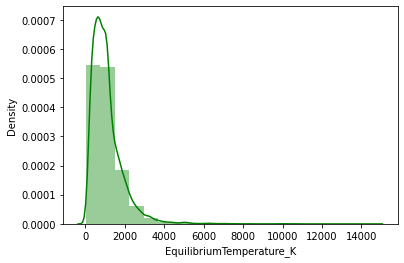

In [25]:
sns.distplot(df['EquilibriumTemperature_K'],color='green',bins=20)

-  for most of the confirmed exoplanets the equilibrium temperature ranges from 0-2000K approximately.

<AxesSubplot:xlabel='TCE_PlanetNumber', ylabel='Count'>

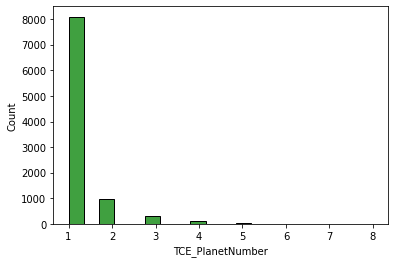

In [26]:
sns.histplot(df['TCE_PlanetNumber'],color='green',bins=20)

<AxesSubplot:xlabel='PlanetaryRadius_Earthradii'>

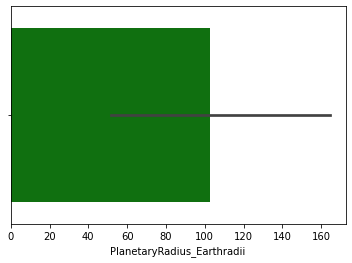

In [27]:
sns.barplot(df['PlanetaryRadius_Earthradii'],color='green')

- Most of the confirmed exoplanets has the radius approximately equal to 100 times the earth's radius.

In [28]:
df.columns

Index(['rowid', 'KepID', 'DispositionScore', 'NotTransit_LikeFPFlag',
       'StellarEclipse_FP_Flag', 'CentroidOffsetFPFlag',
       'EphemerisMatchIndicatesContaminationFPFlag', 'OrbitalPeriod_days',
       'OrbitalPeriodUpper_days', 'OrbitalPeriodLower_days',
       'TransitEpoch_BKJD', 'TransitEpoch_Lower', 'TransitEpoch_Upper',
       'ImpactParamete', 'ImpactParameter_Lower', 'ImpactParameter_Upper',
       'TransitDuration_hrs', 'TransitDuration_Lower', 'TransitDuration_Upper',
       'TransitDepth_ppm', 'TransitDepth_Lower', 'TransitDepth_Upper',
       'PlanetaryRadius_Earthradii', 'PlanetaryRadius_Lower',
       'PlanetaryRadius_Upper', 'EquilibriumTemperature_K',
       'InsolationFlux_Earthflux', 'InsolationFlux_Lower',
       'InsolationFlux_Upper', 'TransitSignal_to_Noise', 'TCE_PlanetNumber',
       'StellarEffectiveTemperature_K', 'StellarEffectiveTemp_Lower',
       'StellarEffectiveTemp_Upper', 'StellarSurfaceGravity',
       'Stellar_SurfaceGravity_Lower', 'Stellar_S

##### We are going to drop few more columns.

- 'rowid','KepID','KOIName', as these will not impact model performance.
-  'InsolationFlux_Earthflux','InsolationFlux_Lower','InsolationFlux_Upper', as it is another way to give the equilibrium temperature which is already present.
- 'StellarSurfaceGravity','Stellar_SurfaceGravity_Lower', 'Stellar_SurfaceGravity_Upper', as it's range is quite same for all the object.

In [29]:
#Removing the unnecessary features

df.drop(columns=['KepID','KOIName','InsolationFlux_Earthflux','InsolationFlux_Lower', 'InsolationFlux_Upper','StellarSurfaceGravity','Stellar_SurfaceGravity_Lower', 'Stellar_SurfaceGravity_Upper',],inplace=True)

In [30]:
df.shape

(9564, 38)

### Checking the correlation

In [31]:
df1=df[['DispositionScore','NotTransit_LikeFPFlag', 'StellarEclipse_FP_Flag',
       'CentroidOffsetFPFlag', 'EphemerisMatchIndicatesContaminationFPFlag',
       'OrbitalPeriod_days','TransitEpoch_BKJD','ImpactParamete','TransitDuration_hrs','PlanetaryRadius_Earthradii','EquilibriumTemperature_K',
       'TransitSignal_to_Noise', 'TCE_PlanetNumber','StellarEffectiveTemperature_K','StellarRadius_Solarradii',]]

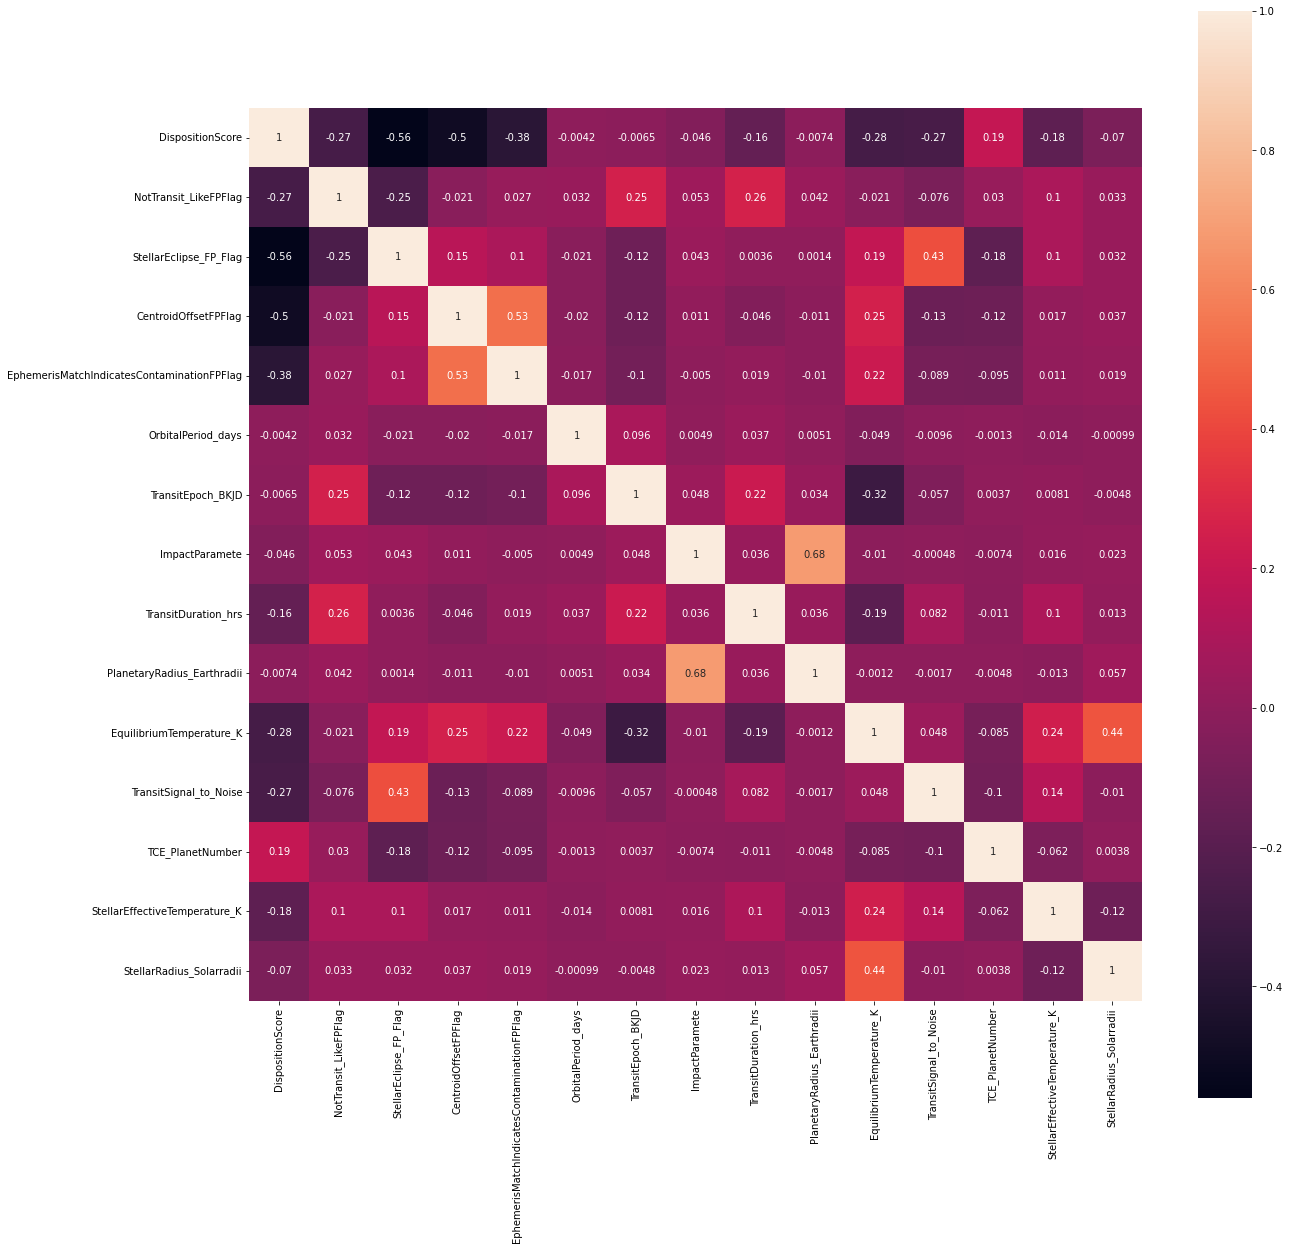

In [32]:
plt.subplots(figsize=(20,20))
sns.heatmap(df1.corr(), square=True,annot=True)
plt.show()

#### Comments:
- We can drop 'EphemerisMatchIndicatesContaminationFPFlag' as it is corelated with 'CentroidOffsetFPFlag'. 
- The corelation between all other features is not so high and seems fine to proceed.


In [33]:
df=df.drop('EphemerisMatchIndicatesContaminationFPFlag',axis=1)

### Separating the Dependent and Independent Features

In [34]:
X=df.drop(['Disposition_Using_KeplerData'],axis=1)   

y=df['Disposition_Using_KeplerData']


### Encoding the Categorical Variables

In [35]:
X=pd.get_dummies(X,columns=['Exoplanet_Archive_Disposition'],drop_first=True)

### Encoding the target variable

In [36]:
y=y.apply(lambda x: 1 if x == 'CANDIDATE' else 0)

### Creating Train and Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
X_train.shape,X_test.shape

((7651, 37), (1913, 37))

#### Scaling using Standard-Scaler

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Bulding Different Models

### Importing different Classification Algorithm

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve

#### Doing it Together

In [42]:
regressors = [KNeighborsClassifier(),LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(),ExtraTreeClassifier(),HistGradientBoostingClassifier(),AdaBoostClassifier()]
names = ['KNearestNeighbour','Logistic_Regression', 'DecisionTree', 'Random_Forest','Gaussian NB','ExtraTree', 'HistGradientBoosting','adaboost']

In [43]:
model_dict = {}
for name, reg in zip(names, regressors):
    
    # training
    reg.fit(X_train, y_train)
    
    # accuracy
    score = reg.score(X_test, y_test)
    model_dict[name] = [accuracy_score(y_train, reg.predict(X_train)),accuracy_score(y_test, reg.predict(X_test)) ]

In [44]:
model_df = pd.DataFrame(model_dict, index = ["Training Accuracy","Testing Accuracy"]).T
model_df= model_df.sort_values(by=["Training Accuracy","Testing Accuracy"], ascending=False)
model_df

,Training Accuracy,Testing Accuracy
DecisionTree,1.000000,0.999477
Random_Forest,1.000000,0.999477
HistGradientBoosting,1.000000,0.999477
adaboost,1.000000,0.999477
ExtraTree,1.000000,0.996341
Logistic_Regression,0.999869,0.999477
KNearestNeighbour,0.995033,0.988500
Gaussian NB,0.994641,0.994250


####  Although every Classifier is performing upto the mark with significant accuracy. so let's inspect Random forest a bit deeper with cross validation.

## RandomForestClassifier

In [45]:
rmf=RandomForestClassifier()

# Train Model
rmf.fit(X_train,y_train)

# Training set performance
train_accuracy= rmf.score(X_train,y_train)

#Testing set performance
test_accuracy=rmf.score(X_test,y_test)
y_pred=rmf.predict(X_test)


print('Accuracy for Training set is')
print( 100*train_accuracy)
print('----------------------------------')
print('Accuracy for Testing set is')
print( 100*test_accuracy)
print('----------------------------------')
print('\n The Classification Report is as below\n')
print(classification_report(y_test,y_pred))


Accuracy for Training set is
100.0
----------------------------------
Accuracy for Testing set is
99.94772608468374
----------------------------------

 The Classification Report is as below

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1019
           1       1.00      1.00      1.00       894

    accuracy                           1.00      1913
   macro avg       1.00      1.00      1.00      1913
weighted avg       1.00      1.00      1.00      1913



#### Comments:

- I got good accuracy with default parameters so I did not tried for any hyperparameter tuning.
- The precision and recall is also 1 which shows our model is quite accurate to predict the candidate exoplanet.

#### Cross-Validating the model

In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rmf,X_train,y_train,cv=5,scoring='accuracy')

print('The accuracy scores are \n',scores)
print('\n\n The Average Accuracy of RandomForest Classifier is\n',scores.mean())

The accuracy scores are 
 [1.         0.99934641 0.99934641 0.99934641 1.        ]


 The Average Accuracy of RandomForest Classifier is
 0.9996078431372549


#### The Confustion Matrix

<AxesSubplot:>

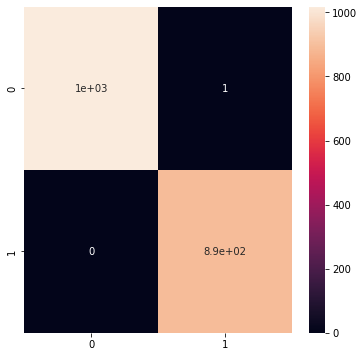

In [47]:
cm = confusion_matrix(y_test,y_pred)

plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)

#### Comments:
- The value of False-positive is 2 which implies that the model has categoriesed only 2 KOI as candidate but in actual they are disposition as false positive exoplanet.

#### The ROC Curve

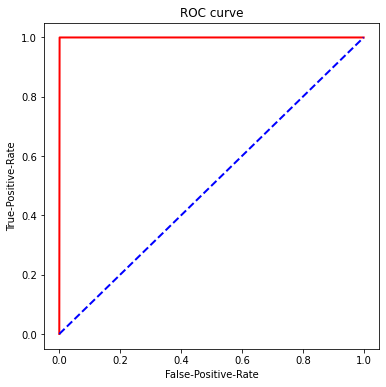

In [48]:
fpr, tpr,_= roc_curve(y_test,y_pred, drop_intermediate=False)

plt.figure()
# Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
# Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
# Title and label
# Title and label
plt.xlabel('False-Positive-Rate')
plt.ylabel('True-Positive-Rate')
plt.title('ROC curve')
plt.show()

#### Comments:
- The area under the Roc curve is maximum which signfies the model is a good separator/classifier. 

## Question/Answer


#### Q1) Why did you choose the particular algorithm?
Ans) I have used Random Forest Classifier as an example because it is a versatile and widely used classification algorithm that often yields good results across a variety of datasets. Here are some reasons why Random Forest might be a suitable choice for classifying the Kepler data:

* High Accuracy: Random Forests tend to perform well in classification tasks, even with complex datasets like the one from Kepler.


* Robustness to Overfitting: Random Forests are less prone to overfitting compared to some other models, thanks to their ensemble nature and the use of multiple decision trees.


* Handle Both Numerical and Categorical Data: Random Forests can handle a mixture of numerical and categorical features without requiring extensive preprocessing.


* Feature Importance: Random Forests provide a measure of feature importance, which can be useful for understanding which features are most relevant for classification.


* Less Sensitive to Hyperparameters: Random Forests are generally less sensitive to hyperparameters compared to some other models, making them easier to tune and less likely to require extensive parameter optimization.


* Parallelization: Random Forests can be easily parallelized, making them efficient for training on large datasets.

While Random Forest is a good starting point, it's essential to experiment with different models and compare their performance to choose the best one for your specific dataset and classification task. Other models like Support Vector Machines, Gradient Boosting Machines, or even deep learning models could also be suitable depending on the characteristics of the data and the desired performance metrics.

#### Q2) What are the different tuning methods used for the algorithm?
Ans) For tuning the Random Forest Classifier (or any machine learning algorithm), several methods can be employed to optimize its performance. Here are some common tuning methods for Random Forests:

* Grid Search: Grid Search involves specifying a grid of hyperparameter values and exhaustively searching through all possible combinations of these values. This method can be computationally expensive but ensures thorough exploration of the hyperparameter space.


* Random Search: Random Search randomly samples hyperparameter values from predefined distributions instead of exhaustively searching through all possible combinations. While it may not guarantee finding the optimal combination, it is more efficient than Grid Search and often finds good solutions with fewer iterations.


* Bayesian Optimization: Bayesian Optimization is an iterative optimization technique that uses probabilistic models to approximate the objective function and decide which hyperparameters to explore next. It typically requires fewer evaluations than Grid Search and Random Search, making it suitable for expensive objective functions.


* Gradient-Based Optimization: Gradient-based optimization methods, such as gradient descent or its variants (e.g., Adam, RMSprop), can be used to optimize hyperparameters by directly optimizing an objective function (e.g., cross-validation score) with respect to hyperparameters.


* Ensemble Methods: Ensemble methods combine multiple models trained with different hyperparameters to improve performance. For Random Forests, this could involve training multiple Random Forest models with different hyperparameters and combining their predictions (e.g., bagging, boosting).


* Cross-Validation: Cross-validation is a technique used to assess the generalization performance of a model and select hyperparameters. By splitting the data into multiple training and validation sets, it provides more reliable estimates of model performance and helps prevent overfitting.


* Feature Selection: Tuning the Random Forest by selecting the most important features can improve its performance and reduce overfitting. Feature selection methods, such as recursive feature elimination or feature importance ranking, can be used in conjunction with hyperparameter tuning.


* Early Stopping: Early stopping is a regularization technique that stops training the model when performance on a validation set starts to degrade. It prevents overfitting and can be used as a form of hyperparameter tuning by determining the optimal number of iterations (trees) for the Random Forest.


These tuning methods can be used individually or in combination to find the optimal hyperparameters for the Random Forest Classifier, ultimately improving its performance on the classification task. Experimentation and careful consideration of the dataset characteristics are crucial for selecting the most effective tuning strategy.

#### Q3) Did you consider any other choice of algorithm?Why or why not?
Ans) Yes, I choose algorithms like Logistic Regression, Decision Tree, AdaBoost, GaussianNB, KNN, etc. Because they are also some other classification techniques. Still I chose Random Forest because of the factors influencing the selection of ML model:-

1) Nature of the Data: Understanding the characteristics of the Kepler data is crucial for selecting an appropriate algorithm. Different algorithms have different strengths and weaknesses, and the nature of the data can influence which algorithm is most suitable.

2) Size of the Dataset: The size of the dataset can impact the choice of algorithm. Some algorithms, like deep learning models, may require a large amount of data to generalize well, while others, like decision trees or random forests, can perform well even with smaller datasets.

3) Complexity of the Model: The complexity of the model needed to capture the relationships in the data is another important consideration. More complex algorithms, such as deep learning models, may be necessary for highly nonlinear or intricate patterns in the data, while simpler models like decision trees may suffice for less complex datasets.

4) Interpretability: Some algorithms, such as decision trees and linear models, offer interpretability, allowing us to understand how the model makes predictions. This can be essential for gaining insights into the underlying relationships in the data.

5) Computational Resources: The computational resources available can also influence the choice of algorithm. Some algorithms, like deep learning models, may require significant computational power and time to train, while others, like decision trees, are relatively faster and more computationally efficient.

Given these factors and the lack of specific information about the characteristics of the Kepler data, I chose the Random Forest Classifier as a starting point because it generally performs well across a wide range of datasets, handles both numerical and categorical data, is less prone to overfitting, and provides insights into feature importance. However, depending on further analysis of the data and specific requirements of the classification task, other algorithms like Support Vector Machines, Gradient Boosting Machines, or even deep learning models could also be considered. Each algorithm has its strengths and weaknesses, and the choice ultimately depends on the specific context of the problem at hand.

#### Q4) What is the accuracy?

Ans) Answer for this question is given below in the form of a code:-

In [50]:
print('The accuracy scores are ',scores)
print('The Average Accuracy of RandomForest Classifier is',scores.mean())

The accuracy scores are  [1.         0.99934641 0.99934641 0.99934641 1.        ]
The Average Accuracy of RandomForest Classifier is 0.9996078431372549


#### Q5) What are the different types of metrics that can be used to evaluate the model?

Ans) Some of the metrics used to evaluate the model are:-

1) Accuracy: Accuracy measures the proportion of correctly classified instances out of the total instances. It is suitable for balanced datasets but can be misleading when the classes are imbalanced.

2) Precision: Precision measures the proportion of true positive predictions out of all positive predictions. It focuses on the accuracy of positive predictions and is useful when the cost of false positives is high.

3) Recall (Sensitivity): Recall measures the proportion of true positive predictions out of all actual positives. It focuses on capturing as many positive instances as possible and is useful when the cost of false negatives is high.

4) F1 Score: F1 Score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is useful when there is an uneven class distribution.

5) ROC Curve and AUC: Receiver Operating Characteristic (ROC) curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The Area Under the ROC Curve (AUC) provides a single scalar value representing the performance of the classifier across all possible thresholds. It is suitable for imbalanced datasets and provides a comprehensive evaluation of the classifier's performance.

6) Confusion Matrix: A confusion matrix provides a tabular representation of the actual vs. predicted classes, showing the number of true positives, true negatives, false positives, and false negatives. It is useful for understanding the types of errors made by the classifier.

7) Specificity: Specificity measures the proportion of true negative predictions out of all actual negatives. It is the complement of the false positive rate and is useful for evaluating the classifier's ability to correctly identify negative instances.

8) F-beta Score: F-beta Score is a generalized form of the F1 Score that allows adjusting the importance of precision and recall using the parameter beta. When beta is less than 1, it gives more weight to precision, and when beta is greater than 1, it gives more weight to recall.

These metrics provide different perspectives on the performance of a classification model and can help assess its effectiveness in various scenarios. It's essential to consider the specific objectives of the classification task and the characteristics of the dataset when selecting the appropriate evaluation metrics.